In [1]:
# Data processing libraries
import pandas as pd
import numpy as np

# Data visualization and animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sns

In [2]:
# Parameters to make more beautiful the plots
plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='paper', style='whitegrid', font='Times New Roman', font_scale=1)

In [42]:
def colors(atom):
    if atom == 1.0:
        return 'black'
    elif atom == 2.0:
        return 'white'
    else:
        return 'green'
    
def sizes(atom):
    if atom == 1.0:
        return 4
    elif atom == 2.0:
        return 16
    else:
        return 55

In [43]:
with open('../FC/dumpnpt.xyz','r') as fout:
    text_particle = fout.read() 

In [48]:
particle_pos = text_particle.split('Atoms. Timestep:')[1:]
particle_coordinates = [data_row.split(' ') for data_row in particle_pos[-1].split('\n')[1:-2]]
atom_data = pd.DataFrame(particle_coordinates, columns=['type','x', 'y', 'z'], dtype=float)
atom_data['c'] = atom_data.type.apply(colors)
atom_data['s'] = atom_data.type.apply(sizes)
atom_data

,type,x,y,z,c,s
0,3.0,-2.553180,-3.34341,-5.651180,green,55
1,1.0,-3.409480,-3.85436,-7.200980,black,4
2,1.0,-4.902150,-3.79239,-7.226890,black,4
3,2.0,-5.982470,-3.62701,-5.453000,white,16
4,1.0,-5.482740,-3.70084,-8.446680,black,4
5,2.0,32.640100,-2.16334,-8.836080,white,16
6,1.0,-4.886850,-3.64145,-9.680990,black,4
7,3.0,-5.660800,-2.87214,-11.194300,green,55
8,1.0,-3.394530,-3.69360,-9.654740,black,4
9,3.0,-2.032070,-1.75801,-11.011500,green,55


<IPython.core.display.Javascript object>


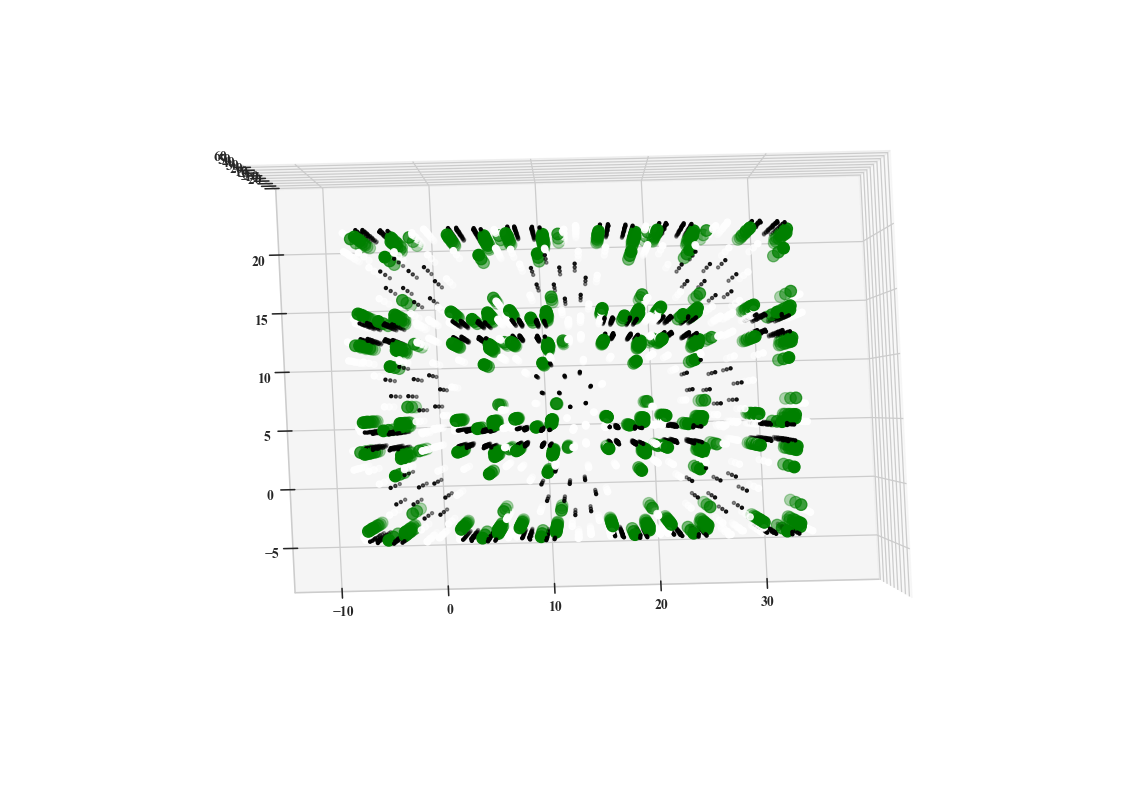

In [49]:
# Environment for plotting 
%matplotlib notebook

# Create a figure 
value = 0
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')


#temporal_dataframes = iron

# 3D plot for visualization (initial conditions)
plot = ax.scatter(xs = np.array(atom_data.x),
               ys = np.array(atom_data.y),
               zs = np.array(atom_data.z),
               c = np.array(atom_data.c),
               s = np.array(atom_data.s))

#Set parameters
#ax.set_title(f'Particle movement at 1000K', size=18)
#ax.set_xlim3d([0.0, (7.4+6.5)*3])
#ax.set_xlabel('X')
#ax.set_ylim3d([0.0, (6.6+8)*3])
#ax.set_ylabel('Y')
#ax.set_zlim3d([0.0, (6.3+6.8)*3])
#ax.set_zlabel('Z')
#ax.view_init(0,90)
    
plt.tight_layout()
#plt.legend(['H','O','Fe'])

# Parameter to change the speed of animation

times_mov = 1
#def animate(i):
#    plot._offsets3d = (temporal_dataframes[times_mov*i].x,
#                       temporal_dataframes[times_mov*i].y,
#                       temporal_dataframes[times_mov*i].z)
    
#ani = animation.FuncAnimation(fig, animate,interval=1,
#                              frames=int(len(temporal_dataframes)/times_mov), repeat=True)